In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:04<00:00, 251MB/s]
100% 1.06G/1.06G [00:04<00:00, 281MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size =32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#normalise
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label


train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128,kernel_size=(3,3),padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy' , metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 108ms/step - loss: 1.3277 - accuracy: 0.5997 - val_loss: 0.5973 - val_accuracy: 0.6800
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.5447 - accuracy: 0.7264 - val_loss: 0.5421 - val_accuracy: 0.7236
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.4750 - accuracy: 0.7772 - val_loss: 0.5013 - val_accuracy: 0.7672
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4060 - accuracy: 0.8146 - val_loss: 0.4395 - val_accuracy: 0.7980
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.3675 - accuracy: 0.8372 - val_loss: 0.5268 - val_accuracy: 0.7548
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2821 - accuracy: 0.8787 - val_loss: 0.8022 - val_accuracy: 0.7670
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2044 - accuracy: 0.9175 - val_loss: 0.5958 - val_ac

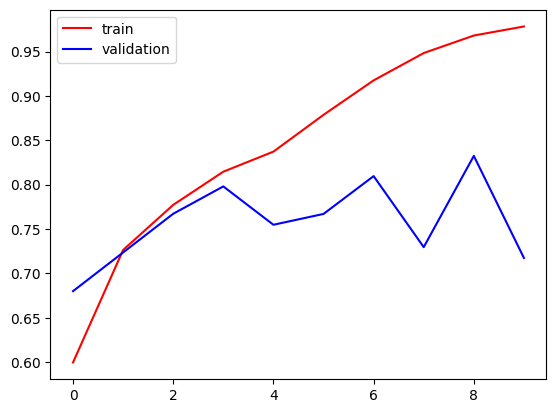

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red', label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


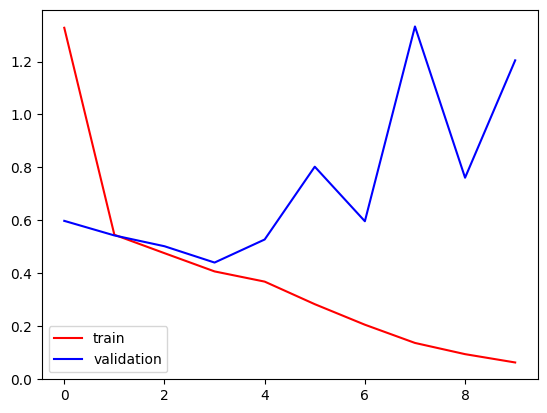

In [ ]:
plt.plot(history.history['loss'],color='red', label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/dog1.jpg')

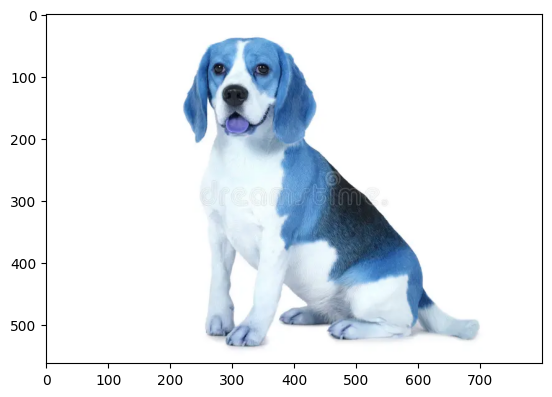

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape


(563, 800, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))


In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[1.]], dtype=float32)

In [ ]:
import cv2

In [ ]:
test2_img = cv2.imread('/content/cat.jpg')

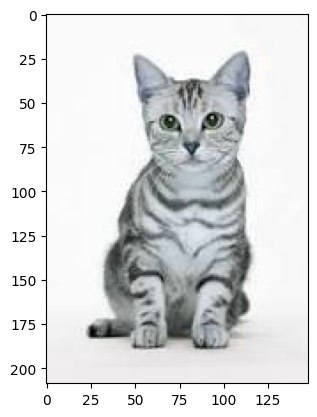

In [ ]:
plt.imshow(test2_img)

In [ ]:
test2_img.shape

(209, 148, 3)

In [ ]:
test2_img = cv2.resize(test_img,(256,256))

In [ ]:
test2_input = test2_img.reshape((1,256,256,3))

In [ ]:
model.predict(test2_input)

1/1 [==============================] - 0s 19ms/step


array([[0.]], dtype=float32)